---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [3]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kitty Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [5]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive
1,Store 1,2.5,Kitty Litter,Kevyn,NaN,True,None
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [6]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [7]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [8]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Sally,Course liasion,Engineering


In [9]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True) 
#conjunto de todos do staff e, se forem alunos, queremos essas infos também.

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [10]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)
#conjunto de todos os alunos, se forem do staff, queremos essas infos também.

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [11]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')#não precisa usar os indices.

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [16]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [13]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
print(staff_df)
print()
print(student_df)
pd.merge(staff_df, student_df,
         how='inner',
         left_on=['First Name','Last Name'],
         right_on=['First Name','Last Name'])

  First Name   Last Name            Role
0      Kelly  Desjardins  Director of HR
1      Sally      Brooks  Course liasion
2      James       Wilde          Grader

  First Name Last Name       School
0      James   Hammond     Business
1       Mike     Smith          Law
2      Sally    Brooks  Engineering


,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [5]:
import pandas as pd
df = pd.read_csv('census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [6]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [7]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

In [8]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [9]:
df.apply(min_max, axis=1).head()

max       min
STNAME  CTYNAME                           
Alabama Autauga County   55347.0   54660.0
        Baldwin County  203709.0  183193.0
        Barbour County   27341.0   26489.0
        Bibb County      22861.0   22512.0
        Blount County    57776.0   57373.0

In [21]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

POPESTIMATE2010    54660
POPESTIMATE2011    55253
POPESTIMATE2012    55175
POPESTIMATE2013    55038
POPESTIMATE2014    55290
POPESTIMATE2015    55347
Name: (Alabama, Autauga County), dtype: object
POPESTIMATE2010    183193
POPESTIMATE2011    186659
POPESTIMATE2012    190396
POPESTIMATE2013    195126
POPESTIMATE2014    199713
POPESTIMATE2015    203709
Name: (Alabama, Baldwin County), dtype: object
POPESTIMATE2010    27341
POPESTIMATE2011    27226
POPESTIMATE2012    27159
POPESTIMATE2013    26973
POPESTIMATE2014    26815
POPESTIMATE2015    26489
Name: (Alabama, Barbour County), dtype: object
POPESTIMATE2010    22861
POPESTIMATE2011    22733
POPESTIMATE2012    22642
POPESTIMATE2013    22512
POPESTIMATE2014    22549
POPESTIMATE2015    22583
Name: (Alabama, Bibb County), dtype: object
POPESTIMATE2010    57373
POPESTIMATE2011    57711
POPESTIMATE2012    57776
POPESTIMATE2013    57734
POPESTIMATE2014    57658
POPESTIMATE2015    57673
Name: (Alabama, Blount County), dtype: object
POPESTIMATE20

Name: (Alabama, Lowndes County), dtype: object
POPESTIMATE2010    21545
POPESTIMATE2011    21269
POPESTIMATE2012    20479
POPESTIMATE2013    19852
POPESTIMATE2014    19387
POPESTIMATE2015    19105
Name: (Alabama, Macon County), dtype: object
POPESTIMATE2010    336138
POPESTIMATE2011    339574
POPESTIMATE2012    342696
POPESTIMATE2013    346720
POPESTIMATE2014    350112
POPESTIMATE2015    353089
Name: (Alabama, Madison County), dtype: object
POPESTIMATE2010    20942
POPESTIMATE2011    20708
POPESTIMATE2012    20449
POPESTIMATE2013    20210
POPESTIMATE2014    20136
POPESTIMATE2015    20028
Name: (Alabama, Marengo County), dtype: object
POPESTIMATE2010    30800
POPESTIMATE2011    30727
POPESTIMATE2012    30515
POPESTIMATE2013    30278
POPESTIMATE2014    30246
POPESTIMATE2015    30168
Name: (Alabama, Marion County), dtype: object
POPESTIMATE2010    93146
POPESTIMATE2011    93906
POPESTIMATE2012    94228
POPESTIMATE2013    94377
POPESTIMATE2014    94356
POPESTIMATE2015    94725
Name: (Alaba

POPESTIMATE2010    3217
POPESTIMATE2011    3244
POPESTIMATE2012    3258
POPESTIMATE2013    3241
POPESTIMATE2014    3184
POPESTIMATE2015    3177
Name: (Alaska, Petersburg Borough), dtype: object
POPESTIMATE2010    6212
POPESTIMATE2011    6377
POPESTIMATE2012    6383
POPESTIMATE2013    6396
POPESTIMATE2014    6384
POPESTIMATE2015    6341
Name: (Alaska, Prince of Wales-Hyder Census Area), dtype: object
POPESTIMATE2010    8898
POPESTIMATE2011    8914
POPESTIMATE2012    9054
POPESTIMATE2013    9003
POPESTIMATE2014    8881
POPESTIMATE2015    8863
Name: (Alaska, Sitka City and Borough), dtype: object
POPESTIMATE2010     965
POPESTIMATE2011     958
POPESTIMATE2012     991
POPESTIMATE2013    1010
POPESTIMATE2014    1038
POPESTIMATE2015    1057
Name: (Alaska, Skagway Municipality), dtype: object
POPESTIMATE2010    7070
POPESTIMATE2011    7144
POPESTIMATE2012    7181
POPESTIMATE2013    7004
POPESTIMATE2014    6978
POPESTIMATE2015    6839
Name: (Alaska, Southeast Fairbanks Census Area), dtype: obj

POPESTIMATE2010    114057
POPESTIMATE2011    116308
POPESTIMATE2012    118566
POPESTIMATE2013    119409
POPESTIMATE2014    120878
POPESTIMATE2015    121552
Name: (Arkansas, Faulkner County), dtype: object
POPESTIMATE2010    18128
POPESTIMATE2011    17994
POPESTIMATE2012    17946
POPESTIMATE2013    17924
POPESTIMATE2014    17766
POPESTIMATE2015    17702
Name: (Arkansas, Franklin County), dtype: object
POPESTIMATE2010    12216
POPESTIMATE2011    12289
POPESTIMATE2012    12248
POPESTIMATE2013    12242
POPESTIMATE2014    12139
POPESTIMATE2015    12204
Name: (Arkansas, Fulton County), dtype: object
POPESTIMATE2010    96128
POPESTIMATE2011    96603
POPESTIMATE2012    96798
POPESTIMATE2013    97006
POPESTIMATE2014    97185
POPESTIMATE2015    97177
Name: (Arkansas, Garland County), dtype: object
POPESTIMATE2010    17890
POPESTIMATE2011    17958
POPESTIMATE2012    18037
POPESTIMATE2013    18059
POPESTIMATE2014    18115
POPESTIMATE2015    18102
Name: (Arkansas, Grant County), dtype: object
POPES

Name: (Arkansas, Sharp County), dtype: object
POPESTIMATE2010    12393
POPESTIMATE2011    12558
POPESTIMATE2012    12604
POPESTIMATE2013    12490
POPESTIMATE2014    12450
POPESTIMATE2015    12456
Name: (Arkansas, Stone County), dtype: object
POPESTIMATE2010    41556
POPESTIMATE2011    41358
POPESTIMATE2012    40868
POPESTIMATE2013    40620
POPESTIMATE2014    40175
POPESTIMATE2015    40144
Name: (Arkansas, Union County), dtype: object
POPESTIMATE2010    17307
POPESTIMATE2011    17199
POPESTIMATE2012    17168
POPESTIMATE2013    16994
POPESTIMATE2014    16880
POPESTIMATE2015    16771
Name: (Arkansas, Van Buren County), dtype: object
POPESTIMATE2010    204026
POPESTIMATE2011    207882
POPESTIMATE2012    211637
POPESTIMATE2013    216480
POPESTIMATE2014    220682
POPESTIMATE2015    225477
Name: (Arkansas, Washington County), dtype: object
POPESTIMATE2010    77333
POPESTIMATE2011    78133
POPESTIMATE2012    78680
POPESTIMATE2013    78685
POPESTIMATE2014    78643
POPESTIMATE2015    79161
Name:

Name: (California, San Mateo County), dtype: object
POPESTIMATE2010    424379
POPESTIMATE2011    426131
POPESTIMATE2012    430873
POPESTIMATE2013    436248
POPESTIMATE2014    441228
POPESTIMATE2015    444769
Name: (California, Santa Barbara County), dtype: object
POPESTIMATE2010    1.78684e+06
POPESTIMATE2011    1.81420e+06
POPESTIMATE2012    1.84132e+06
POPESTIMATE2013    1.87114e+06
POPESTIMATE2014    1.89604e+06
POPESTIMATE2015    1.91804e+06
Name: (California, Santa Clara County), dtype: object
POPESTIMATE2010    263266
POPESTIMATE2011    264971
POPESTIMATE2012    266597
POPESTIMATE2013    269277
POPESTIMATE2014    271401
POPESTIMATE2015    274146
Name: (California, Santa Cruz County), dtype: object
POPESTIMATE2010    177317
POPESTIMATE2011    177969
POPESTIMATE2012    178421
POPESTIMATE2013    179041
POPESTIMATE2014    179747
POPESTIMATE2015    179533
Name: (California, Shasta County), dtype: object
POPESTIMATE2010    3221
POPESTIMATE2011    3105
POPESTIMATE2012    3075
POPESTIMAT

POPESTIMATE2010    14783
POPESTIMATE2011    14544
POPESTIMATE2012    14156
POPESTIMATE2013    14264
POPESTIMATE2014    14477
POPESTIMATE2015    14615
Name: (Colorado, Grand County), dtype: object
POPESTIMATE2010    15379
POPESTIMATE2011    15459
POPESTIMATE2012    15475
POPESTIMATE2013    15525
POPESTIMATE2014    15727
POPESTIMATE2015    16067
Name: (Colorado, Gunnison County), dtype: object
POPESTIMATE2010    844
POPESTIMATE2011    827
POPESTIMATE2012    798
POPESTIMATE2013    808
POPESTIMATE2014    781
POPESTIMATE2015    774
Name: (Colorado, Hinsdale County), dtype: object
POPESTIMATE2010    6668
POPESTIMATE2011    6516
POPESTIMATE2012    6583
POPESTIMATE2013    6488
POPESTIMATE2014    6433
POPESTIMATE2015    6492
Name: (Colorado, Huerfano County), dtype: object
POPESTIMATE2010    1385
POPESTIMATE2011    1383
POPESTIMATE2012    1349
POPESTIMATE2013    1358
POPESTIMATE2014    1395
POPESTIMATE2015    1356
Name: (Colorado, Jackson County), dtype: object
POPESTIMATE2010    535625
POPESTI

POPESTIMATE2010    274067
POPESTIMATE2011    273211
POPESTIMATE2012    274394
POPESTIMATE2013    273716
POPESTIMATE2014    272743
POPESTIMATE2015    271863
Name: (Connecticut, New London County), dtype: object
POPESTIMATE2010    153208
POPESTIMATE2011    153069
POPESTIMATE2012    151934
POPESTIMATE2013    151722
POPESTIMATE2014    151597
POPESTIMATE2015    151420
Name: (Connecticut, Tolland County), dtype: object
POPESTIMATE2010    118593
POPESTIMATE2011    118418
POPESTIMATE2012    117942
POPESTIMATE2013    117586
POPESTIMATE2014    116830
POPESTIMATE2015    116573
Name: (Connecticut, Windham County), dtype: object
POPESTIMATE2010    162990
POPESTIMATE2011    165242
POPESTIMATE2012    167611
POPESTIMATE2013    169385
POPESTIMATE2014    171773
POPESTIMATE2015    173533
Name: (Delaware, Kent County), dtype: object
POPESTIMATE2010    538911
POPESTIMATE2011    542349
POPESTIMATE2012    546211
POPESTIMATE2013    549529
POPESTIMATE2014    553347
POPESTIMATE2015    556779
Name: (Delaware, Ne

POPESTIMATE2010    19231
POPESTIMATE2011    19092
POPESTIMATE2012    18915
POPESTIMATE2013    18711
POPESTIMATE2014    18521
POPESTIMATE2015    18408
Name: (Florida, Madison County), dtype: object
POPESTIMATE2010    323429
POPESTIMATE2011    327320
POPESTIMATE2012    333954
POPESTIMATE2013    342229
POPESTIMATE2014    351771
POPESTIMATE2015    363369
Name: (Florida, Manatee County), dtype: object
POPESTIMATE2010    331421
POPESTIMATE2011    332272
POPESTIMATE2012    334094
POPESTIMATE2013    335688
POPESTIMATE2014    338749
POPESTIMATE2015    343254
Name: (Florida, Marion County), dtype: object
POPESTIMATE2010    146979
POPESTIMATE2011    147647
POPESTIMATE2012    148913
POPESTIMATE2013    151550
POPESTIMATE2014    153538
POPESTIMATE2015    156283
Name: (Florida, Martin County), dtype: object
POPESTIMATE2010    2.50817e+06
POPESTIMATE2011    2.58008e+06
POPESTIMATE2012    2.61118e+06
POPESTIMATE2013    2.64193e+06
POPESTIMATE2014     2.6689e+06
POPESTIMATE2015    2.69312e+06
Name: (Flo

Name: (Georgia, Bulloch County), dtype: object
POPESTIMATE2010    23341
POPESTIMATE2011    23545
POPESTIMATE2012    23115
POPESTIMATE2013    22918
POPESTIMATE2014    22714
POPESTIMATE2015    22745
Name: (Georgia, Burke County), dtype: object
POPESTIMATE2010    23742
POPESTIMATE2011    23564
POPESTIMATE2012    23458
POPESTIMATE2013    23214
POPESTIMATE2014    23394
POPESTIMATE2015    23593
Name: (Georgia, Butts County), dtype: object
POPESTIMATE2010    6704
POPESTIMATE2011    6537
POPESTIMATE2012    6487
POPESTIMATE2013    6512
POPESTIMATE2014    6431
POPESTIMATE2015    6479
Name: (Georgia, Calhoun County), dtype: object
POPESTIMATE2010    50670
POPESTIMATE2011    50312
POPESTIMATE2012    51368
POPESTIMATE2013    51469
POPESTIMATE2014    51973
POPESTIMATE2015    52102
Name: (Georgia, Camden County), dtype: object
POPESTIMATE2010    11025
POPESTIMATE2011    11312
POPESTIMATE2012    11135
POPESTIMATE2013    10942
POPESTIMATE2014    10879
POPESTIMATE2015    10886
Name: (Georgia, Candler Co

POPESTIMATE2010    3069
POPESTIMATE2011    3115
POPESTIMATE2012    3129
POPESTIMATE2013    3079
POPESTIMATE2014    3046
POPESTIMATE2015    3065
Name: (Georgia, Glascock County), dtype: object
POPESTIMATE2010    79790
POPESTIMATE2011    80215
POPESTIMATE2012    80985
POPESTIMATE2013    81592
POPESTIMATE2014    82343
POPESTIMATE2015    83579
Name: (Georgia, Glynn County), dtype: object
POPESTIMATE2010    55207
POPESTIMATE2011    55490
POPESTIMATE2012    55703
POPESTIMATE2013    55763
POPESTIMATE2014    55917
POPESTIMATE2015    56574
Name: (Georgia, Gordon County), dtype: object
POPESTIMATE2010    25047
POPESTIMATE2011    25160
POPESTIMATE2012    25346
POPESTIMATE2013    25194
POPESTIMATE2014    25308
POPESTIMATE2015    25205
Name: (Georgia, Grady County), dtype: object
POPESTIMATE2010    16000
POPESTIMATE2011    16069
POPESTIMATE2012    16141
POPESTIMATE2013    16262
POPESTIMATE2014    16474
POPESTIMATE2015    16710
Name: (Georgia, Greene County), dtype: object
POPESTIMATE2010    808274


POPESTIMATE2010    100171
POPESTIMATE2011    100500
POPESTIMATE2012    101100
POPESTIMATE2013    102312
POPESTIMATE2014    103839
POPESTIMATE2015    105473
Name: (Georgia, Newton County), dtype: object
POPESTIMATE2010    32929
POPESTIMATE2011    33262
POPESTIMATE2012    33536
POPESTIMATE2013    34088
POPESTIMATE2014    35147
POPESTIMATE2015    35965
Name: (Georgia, Oconee County), dtype: object
POPESTIMATE2010    14907
POPESTIMATE2011    14785
POPESTIMATE2012    14598
POPESTIMATE2013    14507
POPESTIMATE2014    14680
POPESTIMATE2015    14871
Name: (Georgia, Oglethorpe County), dtype: object
POPESTIMATE2010    142768
POPESTIMATE2011    143787
POPESTIMATE2012    144981
POPESTIMATE2013    147071
POPESTIMATE2014    148921
POPESTIMATE2015    152238
Name: (Georgia, Paulding County), dtype: object
POPESTIMATE2010    27750
POPESTIMATE2011    27550
POPESTIMATE2012    27473
POPESTIMATE2013    26861
POPESTIMATE2014    26828
POPESTIMATE2015    26720
Name: (Georgia, Peach County), dtype: object
POP

POPESTIMATE2010    2777
POPESTIMATE2011    2799
POPESTIMATE2012    2794
POPESTIMATE2013    2708
POPESTIMATE2014    2650
POPESTIMATE2015    2648
Name: (Georgia, Webster County), dtype: object
POPESTIMATE2010    7756
POPESTIMATE2011    8055
POPESTIMATE2012    7905
POPESTIMATE2013    7933
POPESTIMATE2014    7984
POPESTIMATE2015    7903
Name: (Georgia, Wheeler County), dtype: object
POPESTIMATE2010    27208
POPESTIMATE2011    27383
POPESTIMATE2012    27559
POPESTIMATE2013    27754
POPESTIMATE2014    27942
POPESTIMATE2015    28319
Name: (Georgia, White County), dtype: object
POPESTIMATE2010    102776
POPESTIMATE2011    103106
POPESTIMATE2012    103236
POPESTIMATE2013    103126
POPESTIMATE2014    103596
POPESTIMATE2015    104216
Name: (Georgia, Whitfield County), dtype: object
POPESTIMATE2010    9275
POPESTIMATE2011    9169
POPESTIMATE2012    9029
POPESTIMATE2013    8966
POPESTIMATE2014    8838
POPESTIMATE2015    8857
Name: (Georgia, Wilcox County), dtype: object
POPESTIMATE2010    10484
POP

Name: (Idaho, Lincoln County), dtype: object
POPESTIMATE2010    37592
POPESTIMATE2011    37900
POPESTIMATE2012    37712
POPESTIMATE2013    37628
POPESTIMATE2014    38068
POPESTIMATE2015    38273
Name: (Idaho, Madison County), dtype: object
POPESTIMATE2010    20082
POPESTIMATE2011    20198
POPESTIMATE2012    20119
POPESTIMATE2013    20315
POPESTIMATE2014    20304
POPESTIMATE2015    20461
Name: (Idaho, Minidoka County), dtype: object
POPESTIMATE2010    39335
POPESTIMATE2011    39438
POPESTIMATE2012    39566
POPESTIMATE2013    39912
POPESTIMATE2014    39932
POPESTIMATE2015    40048
Name: (Idaho, Nez Perce County), dtype: object
POPESTIMATE2010    4294
POPESTIMATE2011    4231
POPESTIMATE2012    4229
POPESTIMATE2013    4280
POPESTIMATE2014    4205
POPESTIMATE2015    4281
Name: (Idaho, Oneida County), dtype: object
POPESTIMATE2010    11472
POPESTIMATE2011    11401
POPESTIMATE2012    11403
POPESTIMATE2013    11398
POPESTIMATE2014    11309
POPESTIMATE2015    11310
Name: (Idaho, Owyhee County),

Name: (Illinois, Grundy County), dtype: object
POPESTIMATE2010    8453
POPESTIMATE2011    8419
POPESTIMATE2012    8363
POPESTIMATE2013    8328
POPESTIMATE2014    8298
POPESTIMATE2015    8200
Name: (Illinois, Hamilton County), dtype: object
POPESTIMATE2010    19085
POPESTIMATE2011    19031
POPESTIMATE2012    18891
POPESTIMATE2013    18601
POPESTIMATE2014    18626
POPESTIMATE2015    18543
Name: (Illinois, Hancock County), dtype: object
POPESTIMATE2010    4305
POPESTIMATE2011    4282
POPESTIMATE2012    4259
POPESTIMATE2013    4246
POPESTIMATE2014    4219
POPESTIMATE2015    4135
Name: (Illinois, Hardin County), dtype: object
POPESTIMATE2010    7332
POPESTIMATE2011    7216
POPESTIMATE2012    7051
POPESTIMATE2013    6956
POPESTIMATE2014    6994
POPESTIMATE2015    6995
Name: (Illinois, Henderson County), dtype: object
POPESTIMATE2010    50445
POPESTIMATE2011    50305
POPESTIMATE2012    50142
POPESTIMATE2013    49804
POPESTIMATE2014    49677
POPESTIMATE2015    49489
Name: (Illinois, Henry Coun

Name: (Illinois, Putnam County), dtype: object
POPESTIMATE2010    33458
POPESTIMATE2011    33337
POPESTIMATE2012    32988
POPESTIMATE2013    33122
POPESTIMATE2014    33048
POPESTIMATE2015    32852
Name: (Illinois, Randolph County), dtype: object
POPESTIMATE2010    16216
POPESTIMATE2011    16231
POPESTIMATE2012    16181
POPESTIMATE2013    16092
POPESTIMATE2014    16103
POPESTIMATE2015    16029
Name: (Illinois, Richland County), dtype: object
POPESTIMATE2010    147632
POPESTIMATE2011    147431
POPESTIMATE2012    147713
POPESTIMATE2013    147626
POPESTIMATE2014    146903
POPESTIMATE2015    146133
Name: (Illinois, Rock Island County), dtype: object
POPESTIMATE2010    270364
POPESTIMATE2011    270024
POPESTIMATE2012    268655
POPESTIMATE2013    266863
POPESTIMATE2014    265552
POPESTIMATE2015    264052
Name: (Illinois, St. Clair County), dtype: object
POPESTIMATE2010    24931
POPESTIMATE2011    24953
POPESTIMATE2012    24969
POPESTIMATE2013    24868
POPESTIMATE2014    24579
POPESTIMATE2015 

POPESTIMATE2010    74708
POPESTIMATE2011    75037
POPESTIMATE2012    75355
POPESTIMATE2013    76098
POPESTIMATE2014    76233
POPESTIMATE2015    76778
Name: (Indiana, Floyd County), dtype: object
POPESTIMATE2010    17271
POPESTIMATE2011    17139
POPESTIMATE2012    17108
POPESTIMATE2013    16878
POPESTIMATE2014    16723
POPESTIMATE2015    16591
Name: (Indiana, Fountain County), dtype: object
POPESTIMATE2010    23062
POPESTIMATE2011    23000
POPESTIMATE2012    22984
POPESTIMATE2013    22920
POPESTIMATE2014    22898
POPESTIMATE2015    22872
Name: (Indiana, Franklin County), dtype: object
POPESTIMATE2010    20818
POPESTIMATE2011    20750
POPESTIMATE2012    20653
POPESTIMATE2013    20435
POPESTIMATE2014    20483
POPESTIMATE2015    20315
Name: (Indiana, Fulton County), dtype: object
POPESTIMATE2010    33554
POPESTIMATE2011    33567
POPESTIMATE2012    33577
POPESTIMATE2013    33576
POPESTIMATE2014    33845
POPESTIMATE2015    33775
Name: (Indiana, Gibson County), dtype: object
POPESTIMATE2010  

Name: (Indiana, Pulaski County), dtype: object
POPESTIMATE2010    37908
POPESTIMATE2011    37850
POPESTIMATE2012    37647
POPESTIMATE2013    37507
POPESTIMATE2014    37660
POPESTIMATE2015    37585
Name: (Indiana, Putnam County), dtype: object
POPESTIMATE2010    26180
POPESTIMATE2011    26017
POPESTIMATE2012    25850
POPESTIMATE2013    25600
POPESTIMATE2014    25341
POPESTIMATE2015    25172
Name: (Indiana, Randolph County), dtype: object
POPESTIMATE2010    28835
POPESTIMATE2011    28749
POPESTIMATE2012    28569
POPESTIMATE2013    28493
POPESTIMATE2014    28548
POPESTIMATE2015    28701
Name: (Indiana, Ripley County), dtype: object
POPESTIMATE2010    17367
POPESTIMATE2011    17316
POPESTIMATE2012    17134
POPESTIMATE2013    17001
POPESTIMATE2014    16834
POPESTIMATE2015    16672
Name: (Indiana, Rush County), dtype: object
POPESTIMATE2010    266797
POPESTIMATE2011    266701
POPESTIMATE2012    266524
POPESTIMATE2013    266885
POPESTIMATE2014    267679
POPESTIMATE2015    268441
Name: (Indian

POPESTIMATE2010    12426
POPESTIMATE2011    12420
POPESTIMATE2012    12282
POPESTIMATE2013    12222
POPESTIMATE2014    12197
POPESTIMATE2015    12097
Name: (Iowa, Chickasaw County), dtype: object
POPESTIMATE2010    9312
POPESTIMATE2011    9313
POPESTIMATE2012    9348
POPESTIMATE2013    9256
POPESTIMATE2014    9223
POPESTIMATE2015    9259
Name: (Iowa, Clarke County), dtype: object
POPESTIMATE2010    16633
POPESTIMATE2011    16609
POPESTIMATE2012    16571
POPESTIMATE2013    16478
POPESTIMATE2014    16520
POPESTIMATE2015    16507
Name: (Iowa, Clay County), dtype: object
POPESTIMATE2010    18081
POPESTIMATE2011    17991
POPESTIMATE2012    17926
POPESTIMATE2013    17766
POPESTIMATE2014    17702
POPESTIMATE2015    17644
Name: (Iowa, Clayton County), dtype: object
POPESTIMATE2010    49111
POPESTIMATE2011    49110
POPESTIMATE2012    48719
POPESTIMATE2013    48299
POPESTIMATE2014    47929
POPESTIMATE2015    47768
Name: (Iowa, Clinton County), dtype: object
POPESTIMATE2010    17162
POPESTIMATE20

Name: (Iowa, Marion County), dtype: object
POPESTIMATE2010    40694
POPESTIMATE2011    40993
POPESTIMATE2012    41092
POPESTIMATE2013    41085
POPESTIMATE2014    40896
POPESTIMATE2015    40746
Name: (Iowa, Marshall County), dtype: object
POPESTIMATE2010    15056
POPESTIMATE2011    15010
POPESTIMATE2012    14846
POPESTIMATE2013    14854
POPESTIMATE2014    14754
POPESTIMATE2015    14844
Name: (Iowa, Mills County), dtype: object
POPESTIMATE2010    10806
POPESTIMATE2011    10718
POPESTIMATE2012    10747
POPESTIMATE2013    10725
POPESTIMATE2014    10788
POPESTIMATE2015    10832
Name: (Iowa, Mitchell County), dtype: object
POPESTIMATE2010    9234
POPESTIMATE2011    9255
POPESTIMATE2012    9136
POPESTIMATE2013    9091
POPESTIMATE2014    8979
POPESTIMATE2015    8979
Name: (Iowa, Monona County), dtype: object
POPESTIMATE2010    7984
POPESTIMATE2011    8040
POPESTIMATE2012    8059
POPESTIMATE2013    7974
POPESTIMATE2014    7965
POPESTIMATE2015    7973
Name: (Iowa, Monroe County), dtype: object
P

Name: (Kansas, Chase County), dtype: object
POPESTIMATE2010    3647
POPESTIMATE2011    3614
POPESTIMATE2012    3566
POPESTIMATE2013    3546
POPESTIMATE2014    3474
POPESTIMATE2015    3402
Name: (Kansas, Chautauqua County), dtype: object
POPESTIMATE2010    21550
POPESTIMATE2011    21371
POPESTIMATE2012    21205
POPESTIMATE2013    20903
POPESTIMATE2014    20748
POPESTIMATE2015    20533
Name: (Kansas, Cherokee County), dtype: object
POPESTIMATE2010    2720
POPESTIMATE2011    2702
POPESTIMATE2012    2672
POPESTIMATE2013    2672
POPESTIMATE2014    2687
POPESTIMATE2015    2679
Name: (Kansas, Cheyenne County), dtype: object
POPESTIMATE2010    2201
POPESTIMATE2011    2136
POPESTIMATE2012    2179
POPESTIMATE2013    2196
POPESTIMATE2014    2120
POPESTIMATE2015    2096
Name: (Kansas, Clark County), dtype: object
POPESTIMATE2010    8540
POPESTIMATE2011    8516
POPESTIMATE2012    8510
POPESTIMATE2013    8396
POPESTIMATE2014    8337
POPESTIMATE2015    8347
Name: (Kansas, Clay County), dtype: object


POPESTIMATE2010    33642
POPESTIMATE2011    33650
POPESTIMATE2012    33542
POPESTIMATE2013    33538
POPESTIMATE2014    33243
POPESTIMATE2015    33339
Name: (Kansas, Lyon County), dtype: object
POPESTIMATE2010    29141
POPESTIMATE2011    29216
POPESTIMATE2012    29353
POPESTIMATE2013    29590
POPESTIMATE2014    29161
POPESTIMATE2015    28941
Name: (Kansas, McPherson County), dtype: object
POPESTIMATE2010    12665
POPESTIMATE2011    12544
POPESTIMATE2012    12377
POPESTIMATE2013    12219
POPESTIMATE2014    12208
POPESTIMATE2015    12103
Name: (Kansas, Marion County), dtype: object
POPESTIMATE2010    10109
POPESTIMATE2011    10004
POPESTIMATE2012    10065
POPESTIMATE2013    10022
POPESTIMATE2014     9998
POPESTIMATE2015     9936
Name: (Kansas, Marshall County), dtype: object
POPESTIMATE2010    4592
POPESTIMATE2011    4524
POPESTIMATE2012    4396
POPESTIMATE2013    4298
POPESTIMATE2014    4367
POPESTIMATE2015    4330
Name: (Kansas, Meade County), dtype: object
POPESTIMATE2010    32874
POPE

POPESTIMATE2010    2241
POPESTIMATE2011    2262
POPESTIMATE2012    2234
POPESTIMATE2013    2193
POPESTIMATE2014    2174
POPESTIMATE2015    2157
Name: (Kansas, Wichita County), dtype: object
POPESTIMATE2010    9404
POPESTIMATE2011    9248
POPESTIMATE2012    9124
POPESTIMATE2013    9090
POPESTIMATE2014    8988
POPESTIMATE2015    8856
Name: (Kansas, Wilson County), dtype: object
POPESTIMATE2010    3305
POPESTIMATE2011    3312
POPESTIMATE2012    3266
POPESTIMATE2013    3207
POPESTIMATE2014    3157
POPESTIMATE2015    3115
Name: (Kansas, Woodson County), dtype: object
POPESTIMATE2010    157678
POPESTIMATE2011    158031
POPESTIMATE2012    159472
POPESTIMATE2013    161009
POPESTIMATE2014    162147
POPESTIMATE2015    163369
Name: (Kansas, Wyandotte County), dtype: object
POPESTIMATE2010    18618
POPESTIMATE2011    18721
POPESTIMATE2012    18688
POPESTIMATE2013    18858
POPESTIMATE2014    18967
POPESTIMATE2015    19027
Name: (Kentucky, Adair County), dtype: object
POPESTIMATE2010    20033
POPEST

Name: (Kentucky, Grayson County), dtype: object
POPESTIMATE2010    11236
POPESTIMATE2011    11213
POPESTIMATE2012    11309
POPESTIMATE2013    11167
POPESTIMATE2014    11047
POPESTIMATE2015    11010
Name: (Kentucky, Green County), dtype: object
POPESTIMATE2010    36900
POPESTIMATE2011    36837
POPESTIMATE2012    36702
POPESTIMATE2013    36481
POPESTIMATE2014    36299
POPESTIMATE2015    36068
Name: (Kentucky, Greenup County), dtype: object
POPESTIMATE2010    8551
POPESTIMATE2011    8599
POPESTIMATE2012    8663
POPESTIMATE2013    8669
POPESTIMATE2014    8720
POPESTIMATE2015    8692
Name: (Kentucky, Hancock County), dtype: object
POPESTIMATE2010    107016
POPESTIMATE2011    107457
POPESTIMATE2012    107100
POPESTIMATE2013    108188
POPESTIMATE2014    108463
POPESTIMATE2015    106439
Name: (Kentucky, Hardin County), dtype: object
POPESTIMATE2010    29225
POPESTIMATE2011    29163
POPESTIMATE2012    28605
POPESTIMATE2013    28473
POPESTIMATE2014    28056
POPESTIMATE2015    27703
Name: (Kentuc

POPESTIMATE2010    43608
POPESTIMATE2011    44023
POPESTIMATE2012    44370
POPESTIMATE2013    44500
POPESTIMATE2014    44800
POPESTIMATE2015    45126
Name: (Kentucky, Nelson County), dtype: object
POPESTIMATE2010    7123
POPESTIMATE2011    7097
POPESTIMATE2012    7028
POPESTIMATE2013    7030
POPESTIMATE2014    7088
POPESTIMATE2015    7131
Name: (Kentucky, Nicholas County), dtype: object
POPESTIMATE2010    23845
POPESTIMATE2011    23992
POPESTIMATE2012    24048
POPESTIMATE2013    24019
POPESTIMATE2014    24050
POPESTIMATE2015    24216
Name: (Kentucky, Ohio County), dtype: object
POPESTIMATE2010    60433
POPESTIMATE2011    60767
POPESTIMATE2012    62145
POPESTIMATE2013    63161
POPESTIMATE2014    64237
POPESTIMATE2015    64875
Name: (Kentucky, Oldham County), dtype: object
POPESTIMATE2010    10844
POPESTIMATE2011    10820
POPESTIMATE2012    10756
POPESTIMATE2013    10615
POPESTIMATE2014    10633
POPESTIMATE2015    10730
Name: (Kentucky, Owen County), dtype: object
POPESTIMATE2010    4768

Name: (Louisiana, Catahoula Parish), dtype: object
POPESTIMATE2010    17154
POPESTIMATE2011    16952
POPESTIMATE2012    16861
POPESTIMATE2013    16686
POPESTIMATE2014    16399
POPESTIMATE2015    16295
Name: (Louisiana, Claiborne Parish), dtype: object
POPESTIMATE2010    20831
POPESTIMATE2011    20820
POPESTIMATE2012    20442
POPESTIMATE2013    20445
POPESTIMATE2014    20398
POPESTIMATE2015    20142
Name: (Louisiana, Concordia Parish), dtype: object
POPESTIMATE2010    26684
POPESTIMATE2011    26769
POPESTIMATE2012    26975
POPESTIMATE2013    27016
POPESTIMATE2014    27011
POPESTIMATE2015    27052
Name: (Louisiana, De Soto Parish), dtype: object
POPESTIMATE2010    440722
POPESTIMATE2011    441371
POPESTIMATE2012    444135
POPESTIMATE2013    445129
POPESTIMATE2014    446064
POPESTIMATE2015    446753
Name: (Louisiana, East Baton Rouge Parish), dtype: object
POPESTIMATE2010    7725
POPESTIMATE2011    7661
POPESTIMATE2012    7568
POPESTIMATE2013    7503
POPESTIMATE2014    7466
POPESTIMATE201

Name: (Maryland, Dorchester County), dtype: object
POPESTIMATE2010    234196
POPESTIMATE2011    237338
POPESTIMATE2012    239569
POPESTIMATE2013    241159
POPESTIMATE2014    243475
POPESTIMATE2015    245322
Name: (Maryland, Frederick County), dtype: object
POPESTIMATE2010    30087
POPESTIMATE2011    30106
POPESTIMATE2012    29899
POPESTIMATE2013    29950
POPESTIMATE2014    29652
POPESTIMATE2015    29460
Name: (Maryland, Garrett County), dtype: object
POPESTIMATE2010    245239
POPESTIMATE2011    246710
POPESTIMATE2012    248642
POPESTIMATE2013    249240
POPESTIMATE2014    249949
POPESTIMATE2015    250290
Name: (Maryland, Harford County), dtype: object
POPESTIMATE2010    288634
POPESTIMATE2011    293921
POPESTIMATE2012    299684
POPESTIMATE2013    304850
POPESTIMATE2014    308705
POPESTIMATE2015    313414
Name: (Maryland, Howard County), dtype: object
POPESTIMATE2010    20199
POPESTIMATE2011    20237
POPESTIMATE2012    19983
POPESTIMATE2013    19814
POPESTIMATE2014    19793
POPESTIMATE20

POPESTIMATE2010    38600
POPESTIMATE2011    38902
POPESTIMATE2012    39003
POPESTIMATE2013    38674
POPESTIMATE2014    38320
POPESTIMATE2015    38033
Name: (Michigan, Chippewa County), dtype: object
POPESTIMATE2010    31006
POPESTIMATE2011    30962
POPESTIMATE2012    30788
POPESTIMATE2013    30578
POPESTIMATE2014    30670
POPESTIMATE2015    30553
Name: (Michigan, Clare County), dtype: object
POPESTIMATE2010    75421
POPESTIMATE2011    76206
POPESTIMATE2012    76463
POPESTIMATE2013    77111
POPESTIMATE2014    77353
POPESTIMATE2015    77390
Name: (Michigan, Clinton County), dtype: object
POPESTIMATE2010    14059
POPESTIMATE2011    14034
POPESTIMATE2012    13994
POPESTIMATE2013    13906
POPESTIMATE2014    13742
POPESTIMATE2015    13801
Name: (Michigan, Crawford County), dtype: object
POPESTIMATE2010    37070
POPESTIMATE2011    36944
POPESTIMATE2012    36848
POPESTIMATE2013    36838
POPESTIMATE2014    36552
POPESTIMATE2015    36377
Name: (Michigan, Delta County), dtype: object
POPESTIMATE2

POPESTIMATE2010    1.20293e+06
POPESTIMATE2011    1.21121e+06
POPESTIMATE2012    1.22139e+06
POPESTIMATE2013    1.23271e+06
POPESTIMATE2014     1.2399e+06
POPESTIMATE2015     1.2423e+06
Name: (Michigan, Oakland County), dtype: object
POPESTIMATE2010    26522
POPESTIMATE2011    26417
POPESTIMATE2012    26251
POPESTIMATE2013    26200
POPESTIMATE2014    26174
POPESTIMATE2015    26105
Name: (Michigan, Oceana County), dtype: object
POPESTIMATE2010    21637
POPESTIMATE2011    21535
POPESTIMATE2012    21424
POPESTIMATE2013    21204
POPESTIMATE2014    21010
POPESTIMATE2015    20937
Name: (Michigan, Ogemaw County), dtype: object
POPESTIMATE2010    6745
POPESTIMATE2011    6614
POPESTIMATE2012    6408
POPESTIMATE2013    6305
POPESTIMATE2014    6158
POPESTIMATE2015    6007
Name: (Michigan, Ontonagon County), dtype: object
POPESTIMATE2010    23513
POPESTIMATE2011    23448
POPESTIMATE2012    23265
POPESTIMATE2013    23253
POPESTIMATE2014    23144
POPESTIMATE2015    23058
Name: (Michigan, Osceola Cou

POPESTIMATE2010    31210
POPESTIMATE2011    31093
POPESTIMATE2012    31042
POPESTIMATE2013    30946
POPESTIMATE2014    30789
POPESTIMATE2015    30613
Name: (Minnesota, Freeborn County), dtype: object
POPESTIMATE2010    46199
POPESTIMATE2011    46276
POPESTIMATE2012    46402
POPESTIMATE2013    46395
POPESTIMATE2014    46375
POPESTIMATE2015    46435
Name: (Minnesota, Goodhue County), dtype: object
POPESTIMATE2010    6003
POPESTIMATE2011    6003
POPESTIMATE2012    5945
POPESTIMATE2013    5985
POPESTIMATE2014    5969
POPESTIMATE2015    5903
Name: (Minnesota, Grant County), dtype: object
POPESTIMATE2010    1.15425e+06
POPESTIMATE2011    1.16944e+06
POPESTIMATE2012    1.18462e+06
POPESTIMATE2013    1.19958e+06
POPESTIMATE2014     1.2121e+06
POPESTIMATE2015    1.22315e+06
Name: (Minnesota, Hennepin County), dtype: object
POPESTIMATE2010    18999
POPESTIMATE2011    18917
POPESTIMATE2012    18813
POPESTIMATE2013    18814
POPESTIMATE2014    18743
POPESTIMATE2015    18773
Name: (Minnesota, Housto

Name: (Minnesota, Rock County), dtype: object
POPESTIMATE2010    15572
POPESTIMATE2011    15524
POPESTIMATE2012    15507
POPESTIMATE2013    15532
POPESTIMATE2014    15740
POPESTIMATE2015    15770
Name: (Minnesota, Roseau County), dtype: object
POPESTIMATE2010    200158
POPESTIMATE2011    200353
POPESTIMATE2012    200383
POPESTIMATE2013    200581
POPESTIMATE2014    200780
POPESTIMATE2015    200431
Name: (Minnesota, St. Louis County), dtype: object
POPESTIMATE2010    130537
POPESTIMATE2011    132681
POPESTIMATE2012    135265
POPESTIMATE2013    137533
POPESTIMATE2014    139470
POPESTIMATE2015    141660
Name: (Minnesota, Scott County), dtype: object
POPESTIMATE2010    88799
POPESTIMATE2011    89286
POPESTIMATE2012    89555
POPESTIMATE2013    90251
POPESTIMATE2014    91208
POPESTIMATE2015    91705
Name: (Minnesota, Sherburne County), dtype: object
POPESTIMATE2010    15234
POPESTIMATE2011    15182
POPESTIMATE2012    15109
POPESTIMATE2013    15040
POPESTIMATE2014    14897
POPESTIMATE2015    1

POPESTIMATE2010    19400
POPESTIMATE2011    19196
POPESTIMATE2012    19053
POPESTIMATE2013    18762
POPESTIMATE2014    18508
POPESTIMATE2015    18340
Name: (Mississippi, Holmes County), dtype: object
POPESTIMATE2010    9330
POPESTIMATE2011    9322
POPESTIMATE2012    9210
POPESTIMATE2013    8949
POPESTIMATE2014    8772
POPESTIMATE2015    8669
Name: (Mississippi, Humphreys County), dtype: object
POPESTIMATE2010    1394
POPESTIMATE2011    1391
POPESTIMATE2012    1408
POPESTIMATE2013    1413
POPESTIMATE2014    1386
POPESTIMATE2015    1337
Name: (Mississippi, Issaquena County), dtype: object
POPESTIMATE2010    23411
POPESTIMATE2011    23333
POPESTIMATE2012    23390
POPESTIMATE2013    23448
POPESTIMATE2014    23474
POPESTIMATE2015    23609
Name: (Mississippi, Itawamba County), dtype: object
POPESTIMATE2010    139453
POPESTIMATE2011    140024
POPESTIMATE2012    139995
POPESTIMATE2013    140433
POPESTIMATE2014    141504
POPESTIMATE2015    141425
Name: (Mississippi, Jackson County), dtype: obje

POPESTIMATE2010    19603
POPESTIMATE2011    19608
POPESTIMATE2012    19605
POPESTIMATE2013    19478
POPESTIMATE2014    19452
POPESTIMATE2015    19552
Name: (Mississippi, Tishomingo County), dtype: object
POPESTIMATE2010    10747
POPESTIMATE2011    10580
POPESTIMATE2012    10445
POPESTIMATE2013    10474
POPESTIMATE2014    10545
POPESTIMATE2015    10343
Name: (Mississippi, Tunica County), dtype: object
POPESTIMATE2010    27132
POPESTIMATE2011    27323
POPESTIMATE2012    27363
POPESTIMATE2013    27772
POPESTIMATE2014    28168
POPESTIMATE2015    28429
Name: (Mississippi, Union County), dtype: object
POPESTIMATE2010    15407
POPESTIMATE2011    15391
POPESTIMATE2012    15098
POPESTIMATE2013    14887
POPESTIMATE2014    14878
POPESTIMATE2015    14638
Name: (Mississippi, Walthall County), dtype: object
POPESTIMATE2010    48815
POPESTIMATE2011    48254
POPESTIMATE2012    48123
POPESTIMATE2013    48274
POPESTIMATE2014    47966
POPESTIMATE2015    47485
Name: (Mississippi, Warren County), dtype: ob

Name: (Missouri, DeKalb County), dtype: object
POPESTIMATE2010    15711
POPESTIMATE2011    15577
POPESTIMATE2012    15622
POPESTIMATE2013    15691
POPESTIMATE2014    15578
POPESTIMATE2015    15593
Name: (Missouri, Dent County), dtype: object
POPESTIMATE2010    13642
POPESTIMATE2011    13619
POPESTIMATE2012    13587
POPESTIMATE2013    13457
POPESTIMATE2014    13544
POPESTIMATE2015    13373
Name: (Missouri, Douglas County), dtype: object
POPESTIMATE2010    31945
POPESTIMATE2011    32021
POPESTIMATE2012    31861
POPESTIMATE2013    31676
POPESTIMATE2014    31356
POPESTIMATE2015    30895
Name: (Missouri, Dunklin County), dtype: object
POPESTIMATE2010    101504
POPESTIMATE2011    101625
POPESTIMATE2012    101353
POPESTIMATE2013    101739
POPESTIMATE2014    101999
POPESTIMATE2015    102426
Name: (Missouri, Franklin County), dtype: object
POPESTIMATE2010    15230
POPESTIMATE2011    15113
POPESTIMATE2012    14990
POPESTIMATE2013    14896
POPESTIMATE2014    14885
POPESTIMATE2015    14858
Name: (

POPESTIMATE2010    18240
POPESTIMATE2011    18205
POPESTIMATE2012    18105
POPESTIMATE2013    17787
POPESTIMATE2014    17608
POPESTIMATE2015    17482
Name: (Missouri, Pemiscot County), dtype: object
POPESTIMATE2010    18974
POPESTIMATE2011    18910
POPESTIMATE2012    19047
POPESTIMATE2013    19137
POPESTIMATE2014    19222
POPESTIMATE2015    19183
Name: (Missouri, Perry County), dtype: object
POPESTIMATE2010    42267
POPESTIMATE2011    42134
POPESTIMATE2012    42288
POPESTIMATE2013    42186
POPESTIMATE2014    42213
POPESTIMATE2015    42255
Name: (Missouri, Pettis County), dtype: object
POPESTIMATE2010    45313
POPESTIMATE2011    45186
POPESTIMATE2012    45227
POPESTIMATE2013    44978
POPESTIMATE2014    44960
POPESTIMATE2015    44794
Name: (Missouri, Phelps County), dtype: object
POPESTIMATE2010    18484
POPESTIMATE2011    18639
POPESTIMATE2012    18532
POPESTIMATE2013    18579
POPESTIMATE2014    18485
POPESTIMATE2015    18348
Name: (Missouri, Pike County), dtype: object
POPESTIMATE2010 

Name: (Montana, Custer County), dtype: object
POPESTIMATE2010    1745
POPESTIMATE2011    1773
POPESTIMATE2012    1783
POPESTIMATE2013    1788
POPESTIMATE2014    1801
POPESTIMATE2015    1760
Name: (Montana, Daniels County), dtype: object
POPESTIMATE2010    8938
POPESTIMATE2011    9013
POPESTIMATE2012    9247
POPESTIMATE2013    9399
POPESTIMATE2014    9543
POPESTIMATE2015    9625
Name: (Montana, Dawson County), dtype: object
POPESTIMATE2010    9299
POPESTIMATE2011    9262
POPESTIMATE2012    9223
POPESTIMATE2013    9280
POPESTIMATE2014    9152
POPESTIMATE2015    9139
Name: (Montana, Deer Lodge County), dtype: object
POPESTIMATE2010    2887
POPESTIMATE2011    2930
POPESTIMATE2012    3026
POPESTIMATE2013    3045
POPESTIMATE2014    3111
POPESTIMATE2015    3190
Name: (Montana, Fallon County), dtype: object
POPESTIMATE2010    11588
POPESTIMATE2011    11507
POPESTIMATE2012    11450
POPESTIMATE2013    11524
POPESTIMATE2014    11433
POPESTIMATE2015    11427
Name: (Montana, Fergus County), dtype: 

POPESTIMATE2010    2159
POPESTIMATE2011    2140
POPESTIMATE2012    2100
POPESTIMATE2013    2131
POPESTIMATE2014    2096
POPESTIMATE2015    2110
Name: (Montana, Wheatland County), dtype: object
POPESTIMATE2010    1005
POPESTIMATE2011     989
POPESTIMATE2012    1056
POPESTIMATE2013    1128
POPESTIMATE2014    1125
POPESTIMATE2015    1130
Name: (Montana, Wibaux County), dtype: object
POPESTIMATE2010    148406
POPESTIMATE2011    149865
POPESTIMATE2012    151917
POPESTIMATE2013    154040
POPESTIMATE2014    155588
POPESTIMATE2015    157048
Name: (Montana, Yellowstone County), dtype: object
POPESTIMATE2010    31338
POPESTIMATE2011    31233
POPESTIMATE2012    31388
POPESTIMATE2013    31582
POPESTIMATE2014    31419
POPESTIMATE2015    31587
Name: (Nebraska, Adams County), dtype: object
POPESTIMATE2010    6668
POPESTIMATE2011    6632
POPESTIMATE2012    6529
POPESTIMATE2013    6451
POPESTIMATE2014    6403
POPESTIMATE2015    6414
Name: (Nebraska, Antelope County), dtype: object
POPESTIMATE2010    46

Name: (Nebraska, Hayes County), dtype: object
POPESTIMATE2010    2896
POPESTIMATE2011    2873
POPESTIMATE2012    2884
POPESTIMATE2013    2867
POPESTIMATE2014    2890
POPESTIMATE2015    2883
Name: (Nebraska, Hitchcock County), dtype: object
POPESTIMATE2010    10449
POPESTIMATE2011    10459
POPESTIMATE2012    10403
POPESTIMATE2013    10427
POPESTIMATE2014    10390
POPESTIMATE2015    10313
Name: (Nebraska, Holt County), dtype: object
POPESTIMATE2010    735
POPESTIMATE2011    743
POPESTIMATE2012    712
POPESTIMATE2013    731
POPESTIMATE2014    726
POPESTIMATE2015    732
Name: (Nebraska, Hooker County), dtype: object
POPESTIMATE2010    6267
POPESTIMATE2011    6304
POPESTIMATE2012    6308
POPESTIMATE2013    6347
POPESTIMATE2014    6366
POPESTIMATE2015    6409
Name: (Nebraska, Howard County), dtype: object
POPESTIMATE2010    7516
POPESTIMATE2011    7542
POPESTIMATE2012    7536
POPESTIMATE2013    7522
POPESTIMATE2014    7303
POPESTIMATE2015    7263
Name: (Nebraska, Jefferson County), dtype: ob

POPESTIMATE2010    9606
POPESTIMATE2011    9452
POPESTIMATE2012    9498
POPESTIMATE2013    9415
POPESTIMATE2014    9391
POPESTIMATE2015    9367
Name: (Nebraska, Wayne County), dtype: object
POPESTIMATE2010    3816
POPESTIMATE2011    3768
POPESTIMATE2012    3755
POPESTIMATE2013    3668
POPESTIMATE2014    3668
POPESTIMATE2015    3625
Name: (Nebraska, Webster County), dtype: object
POPESTIMATE2010    824
POPESTIMATE2011    815
POPESTIMATE2012    795
POPESTIMATE2013    760
POPESTIMATE2014    765
POPESTIMATE2015    750
Name: (Nebraska, Wheeler County), dtype: object
POPESTIMATE2010    13654
POPESTIMATE2011    13753
POPESTIMATE2012    13819
POPESTIMATE2013    13836
POPESTIMATE2014    13909
POPESTIMATE2015    13806
Name: (Nebraska, York County), dtype: object
POPESTIMATE2010    24804
POPESTIMATE2011    24601
POPESTIMATE2012    24340
POPESTIMATE2013    24075
POPESTIMATE2014    24046
POPESTIMATE2015    24200
Name: (Nevada, Churchill County), dtype: object
POPESTIMATE2010    1.95338e+06
POPESTIM

Name: (New Jersey, Morris County), dtype: object
POPESTIMATE2010    577643
POPESTIMATE2011    578931
POPESTIMATE2012    580592
POPESTIMATE2013    583090
POPESTIMATE2014    585916
POPESTIMATE2015    588721
Name: (New Jersey, Ocean County), dtype: object
POPESTIMATE2010    502273
POPESTIMATE2011    504193
POPESTIMATE2012    505392
POPESTIMATE2013    507456
POPESTIMATE2014    509913
POPESTIMATE2015    510916
Name: (New Jersey, Passaic County), dtype: object
POPESTIMATE2010    65998
POPESTIMATE2011    66031
POPESTIMATE2012    65656
POPESTIMATE2013    65062
POPESTIMATE2014    64670
POPESTIMATE2015    64180
Name: (New Jersey, Salem County), dtype: object
POPESTIMATE2010    324170
POPESTIMATE2011    326815
POPESTIMATE2012    328674
POPESTIMATE2013    331244
POPESTIMATE2014    332634
POPESTIMATE2015    333654
Name: (New Jersey, Somerset County), dtype: object
POPESTIMATE2010    148815
POPESTIMATE2011    148097
POPESTIMATE2012    147048
POPESTIMATE2013    145826
POPESTIMATE2014    145004
POPEST

POPESTIMATE2010    134750
POPESTIMATE2011    134264
POPESTIMATE2012    133424
POPESTIMATE2013    132991
POPESTIMATE2014    131773
POPESTIMATE2015    130779
Name: (New York, Chautauqua County), dtype: object
POPESTIMATE2010    88969
POPESTIMATE2011    88997
POPESTIMATE2012    89277
POPESTIMATE2013    88523
POPESTIMATE2014    87469
POPESTIMATE2015    87071
Name: (New York, Chemung County), dtype: object
POPESTIMATE2010    50344
POPESTIMATE2011    50219
POPESTIMATE2012    49872
POPESTIMATE2013    49479
POPESTIMATE2014    49333
POPESTIMATE2015    48844
Name: (New York, Chenango County), dtype: object
POPESTIMATE2010    82068
POPESTIMATE2011    81851
POPESTIMATE2012    81863
POPESTIMATE2013    81757
POPESTIMATE2014    81702
POPESTIMATE2015    81251
Name: (New York, Clinton County), dtype: object
POPESTIMATE2010    63020
POPESTIMATE2011    62640
POPESTIMATE2012    62551
POPESTIMATE2013    62298
POPESTIMATE2014    61979
POPESTIMATE2015    61509
Name: (New York, Columbia County), dtype: object

POPESTIMATE2010    51074
POPESTIMATE2011    51022
POPESTIMATE2012    50378
POPESTIMATE2013    50210
POPESTIMATE2014    49930
POPESTIMATE2015    49453
Name: (New York, Tioga County), dtype: object
POPESTIMATE2010    101774
POPESTIMATE2011    102120
POPESTIMATE2012    103133
POPESTIMATE2013    104367
POPESTIMATE2014    104727
POPESTIMATE2015    104926
Name: (New York, Tompkins County), dtype: object
POPESTIMATE2010    182421
POPESTIMATE2011    182676
POPESTIMATE2012    181839
POPESTIMATE2013    181054
POPESTIMATE2014    180787
POPESTIMATE2015    180143
Name: (New York, Ulster County), dtype: object
POPESTIMATE2010    65684
POPESTIMATE2011    65693
POPESTIMATE2012    65421
POPESTIMATE2013    65146
POPESTIMATE2014    64954
POPESTIMATE2015    64688
Name: (New York, Warren County), dtype: object
POPESTIMATE2010    63292
POPESTIMATE2011    63083
POPESTIMATE2012    63041
POPESTIMATE2013    62744
POPESTIMATE2014    62402
POPESTIMATE2015    62230
Name: (New York, Washington County), dtype: objec

Name: (North Carolina, Forsyth County), dtype: object
POPESTIMATE2010    60837
POPESTIMATE2011    61109
POPESTIMATE2012    61586
POPESTIMATE2013    62272
POPESTIMATE2014    62805
POPESTIMATE2015    63710
Name: (North Carolina, Franklin County), dtype: object
POPESTIMATE2010    206077
POPESTIMATE2011    206943
POPESTIMATE2012    208161
POPESTIMATE2013    209450
POPESTIMATE2014    211040
POPESTIMATE2015    213442
Name: (North Carolina, Gaston County), dtype: object
POPESTIMATE2010    12160
POPESTIMATE2011    12070
POPESTIMATE2012    11911
POPESTIMATE2013    11657
POPESTIMATE2014    11550
POPESTIMATE2015    11431
Name: (North Carolina, Gates County), dtype: object
POPESTIMATE2010    8869
POPESTIMATE2011    8789
POPESTIMATE2012    8705
POPESTIMATE2013    8737
POPESTIMATE2014    8651
POPESTIMATE2015    8616
Name: (North Carolina, Graham County), dtype: object
POPESTIMATE2010    57652
POPESTIMATE2011    57673
POPESTIMATE2012    57782
POPESTIMATE2013    58061
POPESTIMATE2014    58357
POPESTIM

POPESTIMATE2010    67746
POPESTIMATE2011    67368
POPESTIMATE2012    67203
POPESTIMATE2013    66825
POPESTIMATE2014    66537
POPESTIMATE2015    66390
Name: (North Carolina, Rutherford County), dtype: object
POPESTIMATE2010    63515
POPESTIMATE2011    63659
POPESTIMATE2012    63901
POPESTIMATE2013    64071
POPESTIMATE2014    64010
POPESTIMATE2015    63724
Name: (North Carolina, Sampson County), dtype: object
POPESTIMATE2010    36081
POPESTIMATE2011    36317
POPESTIMATE2012    36139
POPESTIMATE2013    35978
POPESTIMATE2014    35715
POPESTIMATE2015    35509
Name: (North Carolina, Scotland County), dtype: object
POPESTIMATE2010    60553
POPESTIMATE2011    60471
POPESTIMATE2012    60496
POPESTIMATE2013    60619
POPESTIMATE2014    60629
POPESTIMATE2015    60714
Name: (North Carolina, Stanly County), dtype: object
POPESTIMATE2010    47335
POPESTIMATE2011    47192
POPESTIMATE2012    46761
POPESTIMATE2013    46588
POPESTIMATE2014    46415
POPESTIMATE2015    46351
Name: (North Carolina, Stokes C

POPESTIMATE2010     6399
POPESTIMATE2011     7015
POPESTIMATE2012     7969
POPESTIMATE2013     9269
POPESTIMATE2014    10995
POPESTIMATE2015    12826
Name: (North Dakota, McKenzie County), dtype: object
POPESTIMATE2010    8992
POPESTIMATE2011    9081
POPESTIMATE2012    9372
POPESTIMATE2013    9472
POPESTIMATE2014    9587
POPESTIMATE2015    9744
Name: (North Dakota, McLean County), dtype: object
POPESTIMATE2010    8425
POPESTIMATE2011    8435
POPESTIMATE2012    8504
POPESTIMATE2013    8609
POPESTIMATE2014    8763
POPESTIMATE2015    8853
Name: (North Dakota, Mercer County), dtype: object
POPESTIMATE2010    27577
POPESTIMATE2011    27725
POPESTIMATE2012    28042
POPESTIMATE2013    29016
POPESTIMATE2014    29833
POPESTIMATE2015    30310
Name: (North Dakota, Morton County), dtype: object
POPESTIMATE2010     7720
POPESTIMATE2011     8105
POPESTIMATE2012     8741
POPESTIMATE2013     9338
POPESTIMATE2014     9749
POPESTIMATE2015    10331
Name: (North Dakota, Mountrail County), dtype: object
PO

POPESTIMATE2010    39112
POPESTIMATE2011    39036
POPESTIMATE2012    38832
POPESTIMATE2013    38573
POPESTIMATE2014    38551
POPESTIMATE2015    38352
Name: (Ohio, Defiance County), dtype: object
POPESTIMATE2010    175146
POPESTIMATE2011    178544
POPESTIMATE2012    181127
POPESTIMATE2013    185246
POPESTIMATE2014    189237
POPESTIMATE2015    193013
Name: (Ohio, Delaware County), dtype: object
POPESTIMATE2010    77034
POPESTIMATE2011    76682
POPESTIMATE2012    76464
POPESTIMATE2013    76148
POPESTIMATE2014    75860
POPESTIMATE2015    75550
Name: (Ohio, Erie County), dtype: object
POPESTIMATE2010    146385
POPESTIMATE2011    147333
POPESTIMATE2012    147490
POPESTIMATE2013    148897
POPESTIMATE2014    150432
POPESTIMATE2015    151408
Name: (Ohio, Fairfield County), dtype: object
POPESTIMATE2010    29017
POPESTIMATE2011    28898
POPESTIMATE2012    28837
POPESTIMATE2013    28743
POPESTIMATE2014    28690
POPESTIMATE2015    28679
Name: (Ohio, Fayette County), dtype: object
POPESTIMATE2010  

POPESTIMATE2010    55745
POPESTIMATE2011    55997
POPESTIMATE2012    56361
POPESTIMATE2013    56435
POPESTIMATE2014    56782
POPESTIMATE2015    56998
Name: (Ohio, Pickaway County), dtype: object
POPESTIMATE2010    28738
POPESTIMATE2011    28628
POPESTIMATE2012    28490
POPESTIMATE2013    28368
POPESTIMATE2014    28276
POPESTIMATE2015    28217
Name: (Ohio, Pike County), dtype: object
POPESTIMATE2010    161448
POPESTIMATE2011    161899
POPESTIMATE2012    161482
POPESTIMATE2013    161593
POPESTIMATE2014    162235
POPESTIMATE2015    162275
Name: (Ohio, Portage County), dtype: object
POPESTIMATE2010    42171
POPESTIMATE2011    42007
POPESTIMATE2012    41856
POPESTIMATE2013    41697
POPESTIMATE2014    41521
POPESTIMATE2015    41329
Name: (Ohio, Preble County), dtype: object
POPESTIMATE2010    34459
POPESTIMATE2011    34392
POPESTIMATE2012    34188
POPESTIMATE2013    34090
POPESTIMATE2014    34206
POPESTIMATE2015    34042
Name: (Ohio, Putnam County), dtype: object
POPESTIMATE2010    124173
PO

Name: (Oklahoma, Ellis County), dtype: object
POPESTIMATE2010    60758
POPESTIMATE2011    60706
POPESTIMATE2012    61303
POPESTIMATE2013    62407
POPESTIMATE2014    62977
POPESTIMATE2015    63569
Name: (Oklahoma, Garfield County), dtype: object
POPESTIMATE2010    27554
POPESTIMATE2011    27374
POPESTIMATE2012    27274
POPESTIMATE2013    27342
POPESTIMATE2014    27531
POPESTIMATE2015    27755
Name: (Oklahoma, Garvin County), dtype: object
POPESTIMATE2010    52480
POPESTIMATE2011    52763
POPESTIMATE2012    53060
POPESTIMATE2013    53673
POPESTIMATE2014    53915
POPESTIMATE2015    54648
Name: (Oklahoma, Grady County), dtype: object
POPESTIMATE2010    4535
POPESTIMATE2011    4546
POPESTIMATE2012    4508
POPESTIMATE2013    4514
POPESTIMATE2014    4496
POPESTIMATE2015    4523
Name: (Oklahoma, Grant County), dtype: object
POPESTIMATE2010    6205
POPESTIMATE2011    6151
POPESTIMATE2012    6059
POPESTIMATE2013    6156
POPESTIMATE2014    6149
POPESTIMATE2015    6070
Name: (Oklahoma, Greer Count

POPESTIMATE2010    20800
POPESTIMATE2011    21190
POPESTIMATE2012    21501
POPESTIMATE2013    22004
POPESTIMATE2014    21757
POPESTIMATE2015    21489
Name: (Oklahoma, Texas County), dtype: object
POPESTIMATE2010    7989
POPESTIMATE2011    7985
POPESTIMATE2012    7786
POPESTIMATE2013    7678
POPESTIMATE2014    7613
POPESTIMATE2015    7515
Name: (Oklahoma, Tillman County), dtype: object
POPESTIMATE2010    605197
POPESTIMATE2011    608701
POPESTIMATE2012    614814
POPESTIMATE2013    623488
POPESTIMATE2014    630428
POPESTIMATE2015    639242
Name: (Oklahoma, Tulsa County), dtype: object
POPESTIMATE2010    73413
POPESTIMATE2011    74088
POPESTIMATE2012    75018
POPESTIMATE2013    75680
POPESTIMATE2014    75612
POPESTIMATE2015    76559
Name: (Oklahoma, Wagoner County), dtype: object
POPESTIMATE2010    51064
POPESTIMATE2011    51522
POPESTIMATE2012    51721
POPESTIMATE2013    51569
POPESTIMATE2014    51967
POPESTIMATE2015    52021
Name: (Oklahoma, Washington County), dtype: object
POPESTIMATE

POPESTIMATE2010    68860
POPESTIMATE2011    68661
POPESTIMATE2012    68376
POPESTIMATE2013    68115
POPESTIMATE2014    67693
POPESTIMATE2015    67052
Name: (Pennsylvania, Armstrong County), dtype: object
POPESTIMATE2010    170611
POPESTIMATE2011    170375
POPESTIMATE2012    170271
POPESTIMATE2013    170072
POPESTIMATE2014    169338
POPESTIMATE2015    168871
Name: (Pennsylvania, Beaver County), dtype: object
POPESTIMATE2010    49715
POPESTIMATE2011    49416
POPESTIMATE2012    49376
POPESTIMATE2013    49115
POPESTIMATE2014    48939
POPESTIMATE2015    48586
Name: (Pennsylvania, Bedford County), dtype: object
POPESTIMATE2010    411984
POPESTIMATE2011    412715
POPESTIMATE2012    413516
POPESTIMATE2013    413965
POPESTIMATE2014    414360
POPESTIMATE2015    415271
Name: (Pennsylvania, Berks County), dtype: object
POPESTIMATE2010    127051
POPESTIMATE2011    127192
POPESTIMATE2012    127015
POPESTIMATE2013    126426
POPESTIMATE2014    126016
POPESTIMATE2015    125593
Name: (Pennsylvania, Blai

POPESTIMATE2010    801063
POPESTIMATE2011    805575
POPESTIMATE2012    809701
POPESTIMATE2013    813704
POPESTIMATE2014    816608
POPESTIMATE2015    819264
Name: (Pennsylvania, Montgomery County), dtype: object
POPESTIMATE2010    18307
POPESTIMATE2011    18368
POPESTIMATE2012    18489
POPESTIMATE2013    18516
POPESTIMATE2014    18609
POPESTIMATE2015    18557
Name: (Pennsylvania, Montour County), dtype: object
POPESTIMATE2010    298049
POPESTIMATE2011    298291
POPESTIMATE2012    299290
POPESTIMATE2013    299515
POPESTIMATE2014    300172
POPESTIMATE2015    300813
Name: (Pennsylvania, Northampton County), dtype: object
POPESTIMATE2010    94349
POPESTIMATE2011    94458
POPESTIMATE2012    94519
POPESTIMATE2013    94037
POPESTIMATE2014    93770
POPESTIMATE2015    93246
Name: (Pennsylvania, Northumberland County), dtype: object
POPESTIMATE2010    46002
POPESTIMATE2011    45864
POPESTIMATE2012    45742
POPESTIMATE2013    45571
POPESTIMATE2014    45523
POPESTIMATE2015    45685
Name: (Pennsylva

Name: (South Carolina, Edgefield County), dtype: object
POPESTIMATE2010    23840
POPESTIMATE2011    23583
POPESTIMATE2012    23273
POPESTIMATE2013    23049
POPESTIMATE2014    22890
POPESTIMATE2015    22747
Name: (South Carolina, Fairfield County), dtype: object
POPESTIMATE2010    137081
POPESTIMATE2011    137476
POPESTIMATE2012    138009
POPESTIMATE2013    138276
POPESTIMATE2014    138988
POPESTIMATE2015    138900
Name: (South Carolina, Florence County), dtype: object
POPESTIMATE2010    60135
POPESTIMATE2011    60155
POPESTIMATE2012    60234
POPESTIMATE2013    60444
POPESTIMATE2014    60727
POPESTIMATE2015    61298
Name: (South Carolina, Georgetown County), dtype: object
POPESTIMATE2010    452792
POPESTIMATE2011    459193
POPESTIMATE2012    466810
POPESTIMATE2013    474070
POPESTIMATE2014    482577
POPESTIMATE2015    491863
Name: (South Carolina, Greenville County), dtype: object
POPESTIMATE2010    69731
POPESTIMATE2011    69820
POPESTIMATE2012    69901
POPESTIMATE2013    69754
POPESTI

POPESTIMATE2010    4348
POPESTIMATE2011    4372
POPESTIMATE2012    4372
POPESTIMATE2013    4308
POPESTIMATE2014    4320
POPESTIMATE2015    4333
Name: (South Dakota, Deuel County), dtype: object
POPESTIMATE2010    5326
POPESTIMATE2011    5404
POPESTIMATE2012    5541
POPESTIMATE2013    5589
POPESTIMATE2014    5677
POPESTIMATE2015    5685
Name: (South Dakota, Dewey County), dtype: object
POPESTIMATE2010    2986
POPESTIMATE2011    2985
POPESTIMATE2012    2961
POPESTIMATE2013    2995
POPESTIMATE2014    2948
POPESTIMATE2015    2977
Name: (South Dakota, Douglas County), dtype: object
POPESTIMATE2010    4072
POPESTIMATE2011    4058
POPESTIMATE2012    4026
POPESTIMATE2013    4030
POPESTIMATE2014    3979
POPESTIMATE2015    3999
Name: (South Dakota, Edmunds County), dtype: object
POPESTIMATE2010    7112
POPESTIMATE2011    6974
POPESTIMATE2012    6992
POPESTIMATE2013    6831
POPESTIMATE2014    6864
POPESTIMATE2015    6867
Name: (South Dakota, Fall River County), dtype: object
POPESTIMATE2010    23

POPESTIMATE2010    2825
POPESTIMATE2011    2838
POPESTIMATE2012    2872
POPESTIMATE2013    2831
POPESTIMATE2014    2823
POPESTIMATE2015    2803
Name: (South Dakota, Ziebach County), dtype: object
POPESTIMATE2010    75154
POPESTIMATE2011    75222
POPESTIMATE2012    75354
POPESTIMATE2013    75443
POPESTIMATE2014    75382
POPESTIMATE2015    75749
Name: (Tennessee, Anderson County), dtype: object
POPESTIMATE2010    45103
POPESTIMATE2011    45279
POPESTIMATE2012    45327
POPESTIMATE2013    45712
POPESTIMATE2014    46428
POPESTIMATE2015    47183
Name: (Tennessee, Bedford County), dtype: object
POPESTIMATE2010    16492
POPESTIMATE2011    16421
POPESTIMATE2012    16359
POPESTIMATE2013    16281
POPESTIMATE2014    16115
POPESTIMATE2015    16129
Name: (Tennessee, Benton County), dtype: object
POPESTIMATE2010    12870
POPESTIMATE2011    12837
POPESTIMATE2012    12786
POPESTIMATE2013    13778
POPESTIMATE2014    14526
POPESTIMATE2015    14502
Name: (Tennessee, Bledsoe County), dtype: object
POPESTIM

Name: (Tennessee, Humphreys County), dtype: object
POPESTIMATE2010    11577
POPESTIMATE2011    11490
POPESTIMATE2012    11501
POPESTIMATE2013    11504
POPESTIMATE2014    11478
POPESTIMATE2015    11509
Name: (Tennessee, Jackson County), dtype: object
POPESTIMATE2010    51608
POPESTIMATE2011    51927
POPESTIMATE2012    52289
POPESTIMATE2013    52312
POPESTIMATE2014    52680
POPESTIMATE2015    53240
Name: (Tennessee, Jefferson County), dtype: object
POPESTIMATE2010    18285
POPESTIMATE2011    18212
POPESTIMATE2012    18123
POPESTIMATE2013    18001
POPESTIMATE2014    17917
POPESTIMATE2015    17830
Name: (Tennessee, Johnson County), dtype: object
POPESTIMATE2010    433035
POPESTIMATE2011    436530
POPESTIMATE2012    441097
POPESTIMATE2013    444170
POPESTIMATE2014    448617
POPESTIMATE2015    451324
Name: (Tennessee, Knox County), dtype: object
POPESTIMATE2010    7820
POPESTIMATE2011    7773
POPESTIMATE2012    7708
POPESTIMATE2013    7714
POPESTIMATE2014    7664
POPESTIMATE2015    7576
Name

Name: (Tennessee, Warren County), dtype: object
POPESTIMATE2010    123338
POPESTIMATE2011    124012
POPESTIMATE2012    124919
POPESTIMATE2013    125488
POPESTIMATE2014    125862
POPESTIMATE2015    126302
Name: (Tennessee, Washington County), dtype: object
POPESTIMATE2010    16978
POPESTIMATE2011    16997
POPESTIMATE2012    16988
POPESTIMATE2013    16908
POPESTIMATE2014    16842
POPESTIMATE2015    16748
Name: (Tennessee, Wayne County), dtype: object
POPESTIMATE2010    35031
POPESTIMATE2011    34912
POPESTIMATE2012    34780
POPESTIMATE2013    34283
POPESTIMATE2014    34142
POPESTIMATE2015    33960
Name: (Tennessee, Weakley County), dtype: object
POPESTIMATE2010    25836
POPESTIMATE2011    26045
POPESTIMATE2012    26086
POPESTIMATE2013    26260
POPESTIMATE2014    26350
POPESTIMATE2015    26521
Name: (Tennessee, White County), dtype: object
POPESTIMATE2010    184068
POPESTIMATE2011    188296
POPESTIMATE2012    193010
POPESTIMATE2013    198969
POPESTIMATE2014    205334
POPESTIMATE2015    21

POPESTIMATE2010    3319
POPESTIMATE2011    3282
POPESTIMATE2012    3221
POPESTIMATE2013    3206
POPESTIMATE2014    3242
POPESTIMATE2015    3238
Name: (Texas, Coke County), dtype: object
POPESTIMATE2010    8878
POPESTIMATE2011    8738
POPESTIMATE2012    8667
POPESTIMATE2013    8526
POPESTIMATE2014    8413
POPESTIMATE2015    8338
Name: (Texas, Coleman County), dtype: object
POPESTIMATE2010    788629
POPESTIMATE2011    814698
POPESTIMATE2012    837480
POPESTIMATE2013    858717
POPESTIMATE2014    886052
POPESTIMATE2015    914127
Name: (Texas, Collin County), dtype: object
POPESTIMATE2010    3055
POPESTIMATE2011    3098
POPESTIMATE2012    3027
POPESTIMATE2013    3098
POPESTIMATE2014    3024
POPESTIMATE2015    3044
Name: (Texas, Collingsworth County), dtype: object
POPESTIMATE2010    20884
POPESTIMATE2011    20807
POPESTIMATE2012    20692
POPESTIMATE2013    20739
POPESTIMATE2014    20675
POPESTIMATE2015    20870
Name: (Texas, Colorado County), dtype: object
POPESTIMATE2010    109299
POPESTIM

Name: (Texas, Garza County), dtype: object
POPESTIMATE2010    24876
POPESTIMATE2011    25029
POPESTIMATE2012    25159
POPESTIMATE2013    25330
POPESTIMATE2014    25509
POPESTIMATE2015    25963
Name: (Texas, Gillespie County), dtype: object
POPESTIMATE2010    1231
POPESTIMATE2011    1233
POPESTIMATE2012    1258
POPESTIMATE2013    1243
POPESTIMATE2014    1291
POPESTIMATE2015    1315
Name: (Texas, Glasscock County), dtype: object
POPESTIMATE2010    7223
POPESTIMATE2011    7208
POPESTIMATE2012    7338
POPESTIMATE2013    7464
POPESTIMATE2014    7507
POPESTIMATE2015    7531
Name: (Texas, Goliad County), dtype: object
POPESTIMATE2010    19795
POPESTIMATE2011    19763
POPESTIMATE2012    19936
POPESTIMATE2013    20174
POPESTIMATE2014    20413
POPESTIMATE2015    20573
Name: (Texas, Gonzales County), dtype: object
POPESTIMATE2010    22459
POPESTIMATE2011    22575
POPESTIMATE2012    22818
POPESTIMATE2013    22895
POPESTIMATE2014    23419
POPESTIMATE2015    23210
Name: (Texas, Gray County), dtype: 

POPESTIMATE2010    49648
POPESTIMATE2011    49627
POPESTIMATE2012    49771
POPESTIMATE2013    49879
POPESTIMATE2014    50512
POPESTIMATE2015    50955
Name: (Texas, Kerr County), dtype: object
POPESTIMATE2010    4589
POPESTIMATE2011    4598
POPESTIMATE2012    4540
POPESTIMATE2013    4468
POPESTIMATE2014    4435
POPESTIMATE2015    4388
Name: (Texas, Kimble County), dtype: object
POPESTIMATE2010    288
POPESTIMATE2011    258
POPESTIMATE2012    270
POPESTIMATE2013    272
POPESTIMATE2014    262
POPESTIMATE2015    282
Name: (Texas, King County), dtype: object
POPESTIMATE2010    3595
POPESTIMATE2011    3606
POPESTIMATE2012    3620
POPESTIMATE2013    3603
POPESTIMATE2014    3505
POPESTIMATE2015    3549
Name: (Texas, Kinney County), dtype: object
POPESTIMATE2010    32058
POPESTIMATE2011    32057
POPESTIMATE2012    32129
POPESTIMATE2013    32101
POPESTIMATE2014    31999
POPESTIMATE2015    31857
Name: (Texas, Kleberg County), dtype: object
POPESTIMATE2010    3723
POPESTIMATE2011    3740
POPESTIMA

POPESTIMATE2010    340314
POPESTIMATE2011    343217
POPESTIMATE2012    347926
POPESTIMATE2013    352950
POPESTIMATE2014    356494
POPESTIMATE2015    359715
Name: (Texas, Nueces County), dtype: object
POPESTIMATE2010    10173
POPESTIMATE2011    10435
POPESTIMATE2012    10611
POPESTIMATE2013    10699
POPESTIMATE2014    10720
POPESTIMATE2015    10747
Name: (Texas, Ochiltree County), dtype: object
POPESTIMATE2010    2050
POPESTIMATE2011    2075
POPESTIMATE2012    2047
POPESTIMATE2013    2091
POPESTIMATE2014    2072
POPESTIMATE2015    2069
Name: (Texas, Oldham County), dtype: object
POPESTIMATE2010    82010
POPESTIMATE2011    82339
POPESTIMATE2012    82959
POPESTIMATE2013    83010
POPESTIMATE2014    83519
POPESTIMATE2015    84260
Name: (Texas, Orange County), dtype: object
POPESTIMATE2010    28060
POPESTIMATE2011    28084
POPESTIMATE2012    27820
POPESTIMATE2013    27832
POPESTIMATE2014    27976
POPESTIMATE2015    27895
Name: (Texas, Palo Pinto County), dtype: object
POPESTIMATE2010    2378

POPESTIMATE2010    12663
POPESTIMATE2011    12647
POPESTIMATE2012    12598
POPESTIMATE2013    12679
POPESTIMATE2014    12773
POPESTIMATE2015    12739
Name: (Texas, Terry County), dtype: object
POPESTIMATE2010    1632
POPESTIMATE2011    1640
POPESTIMATE2012    1605
POPESTIMATE2013    1606
POPESTIMATE2014    1614
POPESTIMATE2015    1579
Name: (Texas, Throckmorton County), dtype: object
POPESTIMATE2010    32401
POPESTIMATE2011    32434
POPESTIMATE2012    32631
POPESTIMATE2013    32590
POPESTIMATE2014    32487
POPESTIMATE2015    32623
Name: (Texas, Titus County), dtype: object
POPESTIMATE2010    110676
POPESTIMATE2011    111837
POPESTIMATE2012    113493
POPESTIMATE2013    114963
POPESTIMATE2014    116881
POPESTIMATE2015    118105
Name: (Texas, Tom Green County), dtype: object
POPESTIMATE2010    1.03043e+06
POPESTIMATE2011    1.06204e+06
POPESTIMATE2012    1.09666e+06
POPESTIMATE2013    1.12197e+06
POPESTIMATE2014      1.151e+06
POPESTIMATE2015    1.17656e+06
Name: (Texas, Travis County), d

POPESTIMATE2010     9528
POPESTIMATE2011     9659
POPESTIMATE2012     9815
POPESTIMATE2013    10224
POPESTIMATE2014    10617
POPESTIMATE2015    11065
Name: (Utah, Morgan County), dtype: object
POPESTIMATE2010    1556
POPESTIMATE2011    1523
POPESTIMATE2012    1528
POPESTIMATE2013    1520
POPESTIMATE2014    1486
POPESTIMATE2015    1517
Name: (Utah, Piute County), dtype: object
POPESTIMATE2010    2251
POPESTIMATE2011    2313
POPESTIMATE2012    2272
POPESTIMATE2013    2269
POPESTIMATE2014    2293
POPESTIMATE2015    2311
Name: (Utah, Rich County), dtype: object
POPESTIMATE2010    1.03318e+06
POPESTIMATE2011    1.04869e+06
POPESTIMATE2012    1.06474e+06
POPESTIMATE2013    1.08116e+06
POPESTIMATE2014    1.09289e+06
POPESTIMATE2015    1.10731e+06
Name: (Utah, Salt Lake County), dtype: object
POPESTIMATE2010    14826
POPESTIMATE2011    14796
POPESTIMATE2012    14923
POPESTIMATE2013    15017
POPESTIMATE2014    15252
POPESTIMATE2015    15772
Name: (Utah, San Juan County), dtype: object
POPESTIMA

Name: (Virginia, Campbell County), dtype: object
POPESTIMATE2010    28643
POPESTIMATE2011    28705
POPESTIMATE2012    28980
POPESTIMATE2013    29281
POPESTIMATE2014    29795
POPESTIMATE2015    29984
Name: (Virginia, Caroline County), dtype: object
POPESTIMATE2010    30086
POPESTIMATE2011    30096
POPESTIMATE2012    29938
POPESTIMATE2013    29880
POPESTIMATE2014    29641
POPESTIMATE2015    29724
Name: (Virginia, Carroll County), dtype: object
POPESTIMATE2010    7271
POPESTIMATE2011    7248
POPESTIMATE2012    7168
POPESTIMATE2013    7110
POPESTIMATE2014    7024
POPESTIMATE2015    7040
Name: (Virginia, Charles City County), dtype: object
POPESTIMATE2010    12547
POPESTIMATE2011    12494
POPESTIMATE2012    12399
POPESTIMATE2013    12284
POPESTIMATE2014    12186
POPESTIMATE2015    12201
Name: (Virginia, Charlotte County), dtype: object
POPESTIMATE2010    317312
POPESTIMATE2011    320545
POPESTIMATE2012    324101
POPESTIMATE2013    327955
POPESTIMATE2014    332593
POPESTIMATE2015    335687
N

POPESTIMATE2010    18559
POPESTIMATE2011    18768
POPESTIMATE2012    19151
POPESTIMATE2013    19490
POPESTIMATE2014    19999
POPESTIMATE2015    20392
Name: (Virginia, New Kent County), dtype: object
POPESTIMATE2010    12388
POPESTIMATE2011    12423
POPESTIMATE2012    12213
POPESTIMATE2013    12042
POPESTIMATE2014    12085
POPESTIMATE2015    12155
Name: (Virginia, Northampton County), dtype: object
POPESTIMATE2010    12347
POPESTIMATE2011    12426
POPESTIMATE2012    12368
POPESTIMATE2013    12243
POPESTIMATE2014    12252
POPESTIMATE2015    12232
Name: (Virginia, Northumberland County), dtype: object
POPESTIMATE2010    15833
POPESTIMATE2011    15888
POPESTIMATE2012    15771
POPESTIMATE2013    15661
POPESTIMATE2014    15560
POPESTIMATE2015    15673
Name: (Virginia, Nottoway County), dtype: object
POPESTIMATE2010    33481
POPESTIMATE2011    33857
POPESTIMATE2012    34172
POPESTIMATE2013    34586
POPESTIMATE2014    34978
POPESTIMATE2015    35385
Name: (Virginia, Orange County), dtype: objec

POPESTIMATE2010    24202
POPESTIMATE2011    25641
POPESTIMATE2012    27097
POPESTIMATE2013    27816
POPESTIMATE2014    28305
POPESTIMATE2015    28118
Name: (Virginia, Fredericksburg city), dtype: object
POPESTIMATE2010    7009
POPESTIMATE2011    6803
POPESTIMATE2012    6838
POPESTIMATE2013    6914
POPESTIMATE2014    6912
POPESTIMATE2015    6914
Name: (Virginia, Galax city), dtype: object
POPESTIMATE2010    137448
POPESTIMATE2011    136601
POPESTIMATE2012    137163
POPESTIMATE2013    137376
POPESTIMATE2014    137813
POPESTIMATE2015    136454
Name: (Virginia, Hampton city), dtype: object
POPESTIMATE2010    49048
POPESTIMATE2011    49757
POPESTIMATE2012    51100
POPESTIMATE2013    51288
POPESTIMATE2014    52258
POPESTIMATE2015    52538
Name: (Virginia, Harrisonburg city), dtype: object
POPESTIMATE2010    22634
POPESTIMATE2011    22471
POPESTIMATE2012    22276
POPESTIMATE2013    22131
POPESTIMATE2014    22137
POPESTIMATE2015    22378
Name: (Virginia, Hopewell city), dtype: object
POPESTIMA

Name: (Washington, Klickitat County), dtype: object
POPESTIMATE2010    75516
POPESTIMATE2011    75701
POPESTIMATE2012    75591
POPESTIMATE2013    75178
POPESTIMATE2014    75224
POPESTIMATE2015    75882
Name: (Washington, Lewis County), dtype: object
POPESTIMATE2010    10570
POPESTIMATE2011    10518
POPESTIMATE2012    10442
POPESTIMATE2013    10281
POPESTIMATE2014    10253
POPESTIMATE2015    10321
Name: (Washington, Lincoln County), dtype: object
POPESTIMATE2010    60752
POPESTIMATE2011    60917
POPESTIMATE2012    60772
POPESTIMATE2013    60550
POPESTIMATE2014    60694
POPESTIMATE2015    61023
Name: (Washington, Mason County), dtype: object
POPESTIMATE2010    41246
POPESTIMATE2011    41358
POPESTIMATE2012    41270
POPESTIMATE2013    41168
POPESTIMATE2014    41347
POPESTIMATE2015    41516
Name: (Washington, Okanogan County), dtype: object
POPESTIMATE2010    20884
POPESTIMATE2011    20853
POPESTIMATE2012    20549
POPESTIMATE2013    20424
POPESTIMATE2014    20551
POPESTIMATE2015    20848
N

POPESTIMATE2010    36727
POPESTIMATE2011    36456
POPESTIMATE2012    36340
POPESTIMATE2013    35985
POPESTIMATE2014    35310
POPESTIMATE2015    34707
Name: (West Virginia, Logan County), dtype: object
POPESTIMATE2010    22075
POPESTIMATE2011    21699
POPESTIMATE2012    21316
POPESTIMATE2013    20874
POPESTIMATE2014    20286
POPESTIMATE2015    19835
Name: (West Virginia, McDowell County), dtype: object
POPESTIMATE2010    56514
POPESTIMATE2011    56620
POPESTIMATE2012    56777
POPESTIMATE2013    56769
POPESTIMATE2014    56859
POPESTIMATE2015    56925
Name: (West Virginia, Marion County), dtype: object
POPESTIMATE2010    33061
POPESTIMATE2011    32844
POPESTIMATE2012    32691
POPESTIMATE2013    32577
POPESTIMATE2014    32310
POPESTIMATE2015    31978
Name: (West Virginia, Marshall County), dtype: object
POPESTIMATE2010    27351
POPESTIMATE2011    27334
POPESTIMATE2012    27242
POPESTIMATE2013    27172
POPESTIMATE2014    27100
POPESTIMATE2015    27037
Name: (West Virginia, Mason County), dt

Name: (Wisconsin, Door County), dtype: object
POPESTIMATE2010    44172
POPESTIMATE2011    44012
POPESTIMATE2012    43819
POPESTIMATE2013    43832
POPESTIMATE2014    43733
POPESTIMATE2015    43601
Name: (Wisconsin, Douglas County), dtype: object
POPESTIMATE2010    43883
POPESTIMATE2011    43880
POPESTIMATE2012    43934
POPESTIMATE2013    44186
POPESTIMATE2014    44300
POPESTIMATE2015    44497
Name: (Wisconsin, Dunn County), dtype: object
POPESTIMATE2010     99036
POPESTIMATE2011     99935
POPESTIMATE2012    100897
POPESTIMATE2013    101789
POPESTIMATE2014    101677
POPESTIMATE2015    102105
Name: (Wisconsin, Eau Claire County), dtype: object
POPESTIMATE2010    4398
POPESTIMATE2011    4493
POPESTIMATE2012    4466
POPESTIMATE2013    4501
POPESTIMATE2014    4461
POPESTIMATE2015    4464
Name: (Wisconsin, Florence County), dtype: object
POPESTIMATE2010    101712
POPESTIMATE2011    101898
POPESTIMATE2012    101856
POPESTIMATE2013    101865
POPESTIMATE2014    102010
POPESTIMATE2015    101973
N

Name: (Wisconsin, Taylor County), dtype: object
POPESTIMATE2010    28850
POPESTIMATE2011    29048
POPESTIMATE2012    29370
POPESTIMATE2013    29577
POPESTIMATE2014    29515
POPESTIMATE2015    29550
Name: (Wisconsin, Trempealeau County), dtype: object
POPESTIMATE2010    29742
POPESTIMATE2011    30037
POPESTIMATE2012    30209
POPESTIMATE2013    30283
POPESTIMATE2014    30360
POPESTIMATE2015    30506
Name: (Wisconsin, Vernon County), dtype: object
POPESTIMATE2010    21442
POPESTIMATE2011    21369
POPESTIMATE2012    21288
POPESTIMATE2013    21334
POPESTIMATE2014    21398
POPESTIMATE2015    21387
Name: (Wisconsin, Vilas County), dtype: object
POPESTIMATE2010    102188
POPESTIMATE2011    102798
POPESTIMATE2012    103055
POPESTIMATE2013    103041
POPESTIMATE2014    103499
POPESTIMATE2015    102804
Name: (Wisconsin, Walworth County), dtype: object
POPESTIMATE2010    15930
POPESTIMATE2011    15784
POPESTIMATE2012    15831
POPESTIMATE2013    15657
POPESTIMATE2014    15678
POPESTIMATE2015    1555

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [25]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME     CTYNAME           
Alabama    Autauga County         55347.0
           Baldwin County        203709.0
           Barbour County         27341.0
           Bibb County            22861.0
           Blount County          57776.0
           Bullock County         10887.0
           Butler County          20944.0
           Calhoun County        118437.0
           Chambers County        34153.0
           Cherokee County        26084.0
           Chilton County         43943.0
           Choctaw County         13841.0
           Clarke County          25767.0
           Clay County            13880.0
           Cleburne County        15072.0
           Coffee County          51211.0
           Colbert County         54514.0
           Conecuh County         13208.0
           Coosa County           11758.0
           Covington County       38060.0
           Crenshaw County        13963.0
           Cullman County         82005.0
           Dale County            50358.0
    

# Group by

In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [ ]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

In [23]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Count

Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counti

Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
C

Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Count

Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Cou

Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Countie

Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri h

Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland 

Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties i

Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Countie

Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counti

In [23]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [24]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + 
          ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [53]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [58]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average}).head()
#Aplica uma função para coluna(s) de dados no grupo e retorna os resultados
#passa como parâmetro um dicionário com as colunas e as funções.

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [59]:
df.set_index('STNAME').groupby(level=0).agg({'CENSUS2010POP': np.average}).head()

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [27]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.SeriesGroupBy'>


In [28]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum})).head()

,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956


In [29]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum})).head()

avg                             sum                
           POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010 POPESTIMATE2011
STNAME                                                                    
Alabama       71420.313433    71658.328358         4785161         4801108
Alaska        24621.413793    24921.379310          714021          722720
Arizona      427213.866667   431248.800000         6408208         6468732
Arkansas      38965.253333    39180.506667         2922394         2938538
California   643691.017241   650000.586207        37334079        37700034

In [30]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum})).head()

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034


# Scales

In [33]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [34]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [35]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [36]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [40]:
s = pd.Series(list('abcaaaaa'))
s

0    a
1    b
2    c
3    a
4    a
5    a
6    a
7    a
dtype: object

In [41]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0


In [42]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

STNAME
Alabama                  (11706.0871, 75333.413]
Alaska                   (11706.0871, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                 (11706.0871, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                  (11706.0871, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                    (11706.0871, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                  (11706.0871, 75333.413]
Iowa                     (11706.0871, 75333.413]
Kansas                   (11706.0871, 75333.413]
Kentucky                 (11706.0871, 75333.413]
Louisiana                (11706.0871, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables

In [43]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [44]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7


In [45]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [48]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

            
Make   All  
YEAR        
2012  49.0  
2013  35.0  
2014  35.0  
2015  35.0  
2016  35.0  
All   35.0

# Date Functionality in Pandas

In [1]:
import pandas as pd
import numpy as np

### Timestamp

In [55]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [53]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [54]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [6]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [7]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [8]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [9]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [10]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,16,46
"Aug 29, 2014",14,66
2015-06-26,59,99
7/12/16,27,17


In [11]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,16,46
2014-08-29,14,66
2015-06-26,59,99
2016-07-12,27,17


In [12]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [13]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [14]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [2]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [3]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,97,129
2016-10-16,102,120
2016-10-30,102,121
2016-11-13,99,121
2016-11-27,104,125
2016-12-11,105,116
2016-12-25,114,123
2017-01-08,115,128
2017-01-22,110,116


In [4]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [5]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,5.0,-9.0
2016-10-30,0.0,1.0
2016-11-13,-3.0,0.0
2016-11-27,5.0,4.0
2016-12-11,1.0,-9.0
2016-12-25,9.0,7.0
2017-01-08,1.0,5.0
2017-01-22,-5.0,-12.0


In [6]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,100.333333,123.333333
2016-11-30,101.500000,123.000000
2016-12-31,109.500000,119.500000
2017-01-31,112.500000,122.000000


In [7]:
df['2017']

,Count 1,Count 2
2017-01-08,115,128
2017-01-22,110,116


In [8]:
df['2016-12']

,Count 1,Count 2
2016-12-11,105,116
2016-12-25,114,123


In [9]:
df['2016-12':]#Dessa data pra frente

,Count 1,Count 2
2016-12-11,105,116
2016-12-25,114,123
2017-01-08,115,128
2017-01-22,110,116


In [10]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,97,129
2016-10-09,97,129
2016-10-16,102,120
2016-10-23,102,120
2016-10-30,102,121
2016-11-06,102,121
2016-11-13,99,121
2016-11-20,99,121
2016-11-27,104,125
2016-12-04,104,125


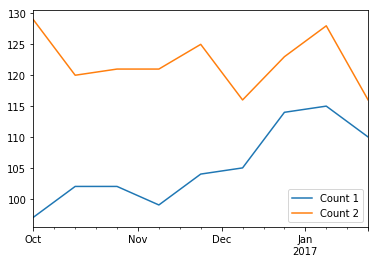

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()